In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style
matplotlib.style.use('ggplot')

In [2]:
%matplotlib inline

# 확률 모형

# 1. 정규분포
- 자연 현상에서 많이 나타나는 숫자를 확률 모형으로 모형화할 때 가장 많이 사용된다.
- 종형 곡선 모양의 분포이며, 평균과 표준편차로 정의된다.
    - 평균 : 종의 중심이 어디인지
    - 종의 폭이 얼마나 넓은지
    
- 정규 분포의 밀도 함수
### $ f(x | \mu, \sigma) = \frac {1} {\sqrt {2\pi}\sigma} exp(-\frac {(x - \mu )^2} {2 \sigma ^2})  $

In [3]:
## 정규 분포 구현

def normal_pdf(x, mu = 0, sigma = 1):
    import math
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu)**2 / 2 / sigma**2) / (sqrt_two_pi * sigma))

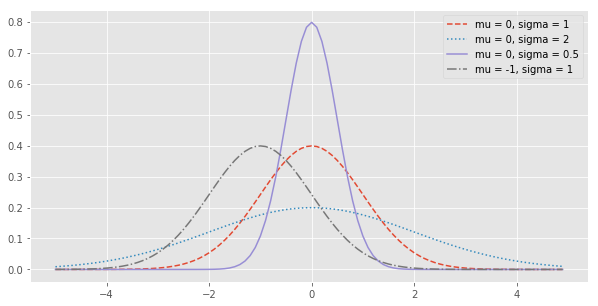

In [4]:
xs = [x/10 for x in range(-50, 50)]
plt.figure(figsize=(10, 5))
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '--', label = 'mu = 0, sigma = 1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], ':', label = 'mu = 0, sigma = 2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], '-', label = 'mu = 0, sigma = 0.5')
plt.plot(xs, [normal_pdf(x, mu = -1) for x in xs], '-.', label = 'mu = -1, sigma = 1')
plt.legend()
plt.show()

## scipy를 활용한 정규분포 
- 정규 분포 (확률 분포)를 따르는 확률 변수 생성
- 그 확률 변수로 부터 n개의 표본 생성

In [5]:
from scipy import stats

In [8]:
# 정규분포를 따르는 확률 변수 생성

# rv = stats.norm(0.5, 2)

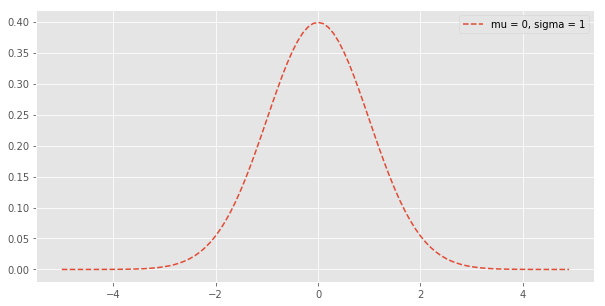

In [10]:
xs = [x/10 for x in range(-50, 50)]
plt.figure(figsize=(10, 5))
rv = stats.norm(0, 1)
plt.plot(xs, [rv.pdf(x) for x in xs], '--', label = 'mu = 0, sigma = 1')  ## 
plt.legend()
plt.show()

# 2. 표준 정규 분포
- 평균이 0이고, 표준편차가 1인 정규분포
### $Z = \frac{X-\mu} {\sigma}$

In [11]:
## 표준정규분포의 누적분포함수 구현
## error function으로 누적분포 함수 구현 (적분)
## https://en.wikipedia.org/wiki/Error_function

def normal_cdf(x, mu=0,sigma=1):
    import math
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

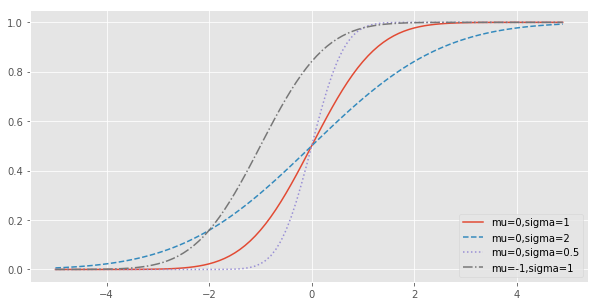

In [12]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.figure(figsize=(10, 5))
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # 우측 하단
plt.show()

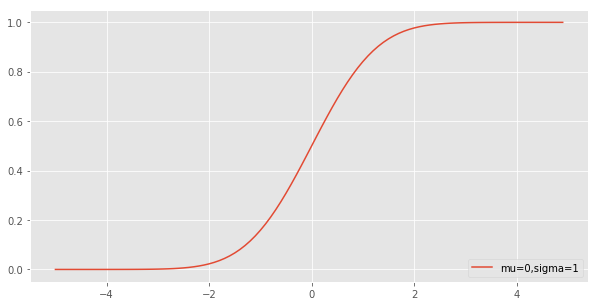

In [13]:
## scipy

xs = [x / 10.0 for x in range(-50, 50)]
plt.figure(figsize=(10, 5))
plt.plot(xs,[rv.cdf(x) for x in xs],'-',label='mu=0,sigma=1')
plt.legend(loc=4) # 우측 하단
plt.show()

### 데이터 분석에서 어떤 확률 변수의 확률이 궁금할 때도 있지만, 어떤 확률 값을 가지는 확률 변수 값이 궁금할 때가 있다.

In [14]:
# ppf 메서드를 이용해서 확률 변수 값을 구한다.
## ppf : percent point function (inverse of cdf — percentiles)

rv.ppf(0.7)

0.5244005127080407

# 3. 이항분포

In [15]:
## 베르누이 시행 구현
def bernoulli_trial(p):
    import random
    return 1 if random.random() < p else 0

In [16]:
## 이항확률변수 구현
def binomial(p, n):
    return sum(bernoulli_trial(p) for _ in range(n))

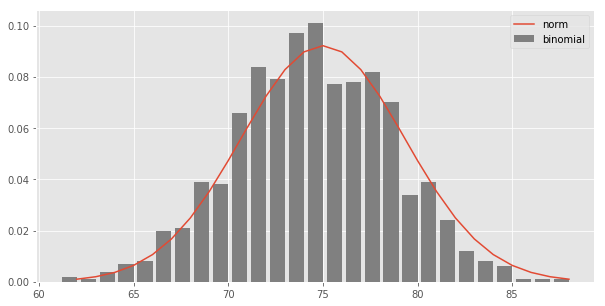

In [17]:
## n이 충분히 크다면, 이항확률변수는 정규분포 확률변수에 근사한다.

def make_hist(p, n, num_points):
    from collections import Counter
    import math
    
    data = [binomial(p, n) for _ in range(num_points)]
    
    # 이항분포를 막대그래프로 표현
    histogram = Counter(data)  # 빈도수 세기
    plt.figure(figsize = (10, 5))
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8, color = 'grey', label = 'binomial')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # 근사된 정규 분포 
    xs = range(min(data), max(data) + 1)
    ys = [normal_pdf(i, mu, sigma) for i in xs]
    plt.plot(xs,ys, label = 'norm')
    plt.legend()
    plt.show()

make_hist(0.75, 100,1000)

### 이항분포는 근사적으로 정규 분포를 따르는걸 볼 수 있다.

# 4. t 분포

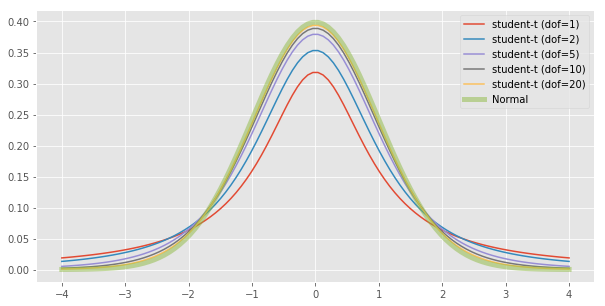

In [19]:
xx = np.linspace(-4, 4, 100)
plt.figure(figsize = (10, 5))
for dof in [1, 2, 5, 10, 20]:
    rv = stats.t(df=dof)
    plt.plot(xx, rv.pdf(xx), label=("student-t (dof={})".format(dof)))
plt.plot(xx, stats.norm().pdf(xx), label="Normal", lw=5, alpha=0.5)
plt.legend()
plt.show()